In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
from src.utils import k_sensitivity_df
from src.visualization.plots import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = k_sensitivity_df()

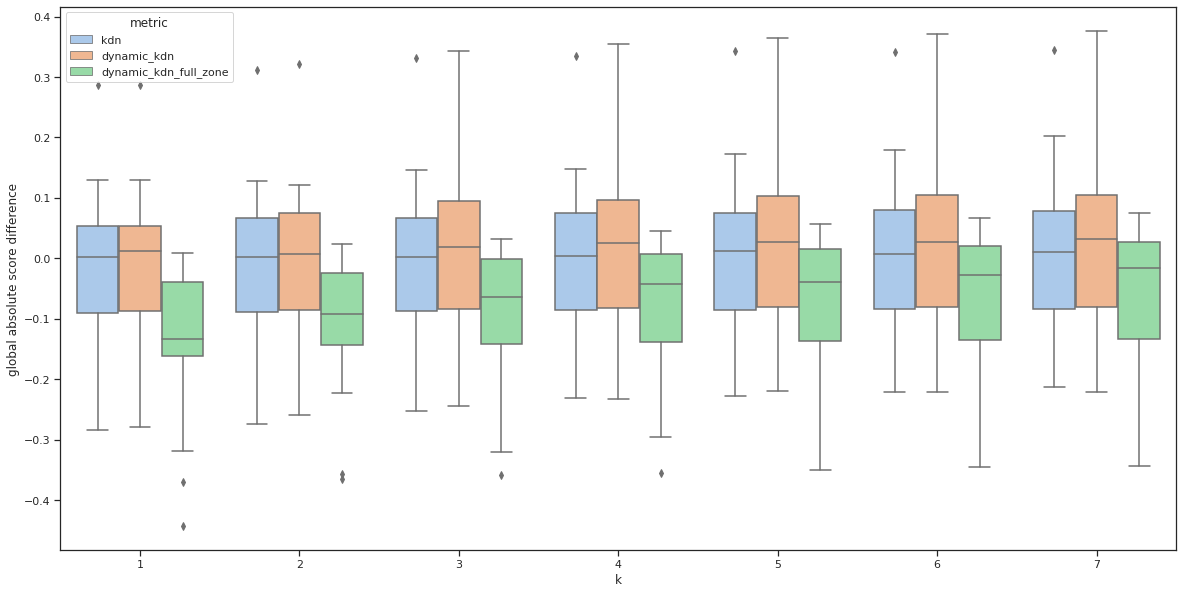

In [12]:
box_plot(df, "global absolute score difference")

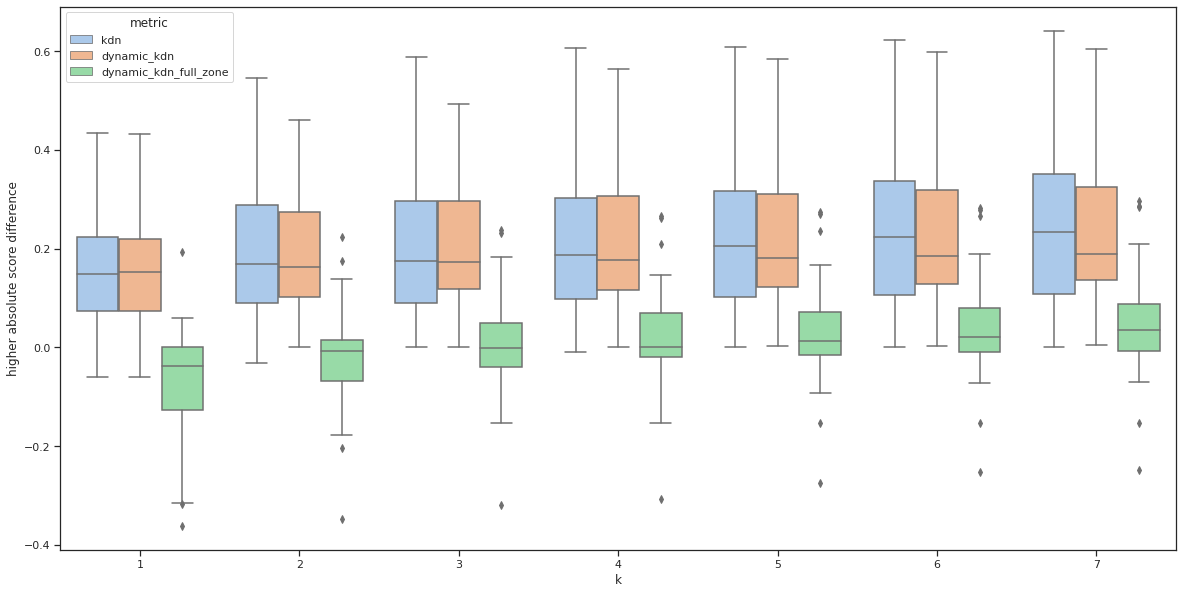

In [13]:
box_plot(df, "higher absolute score difference")

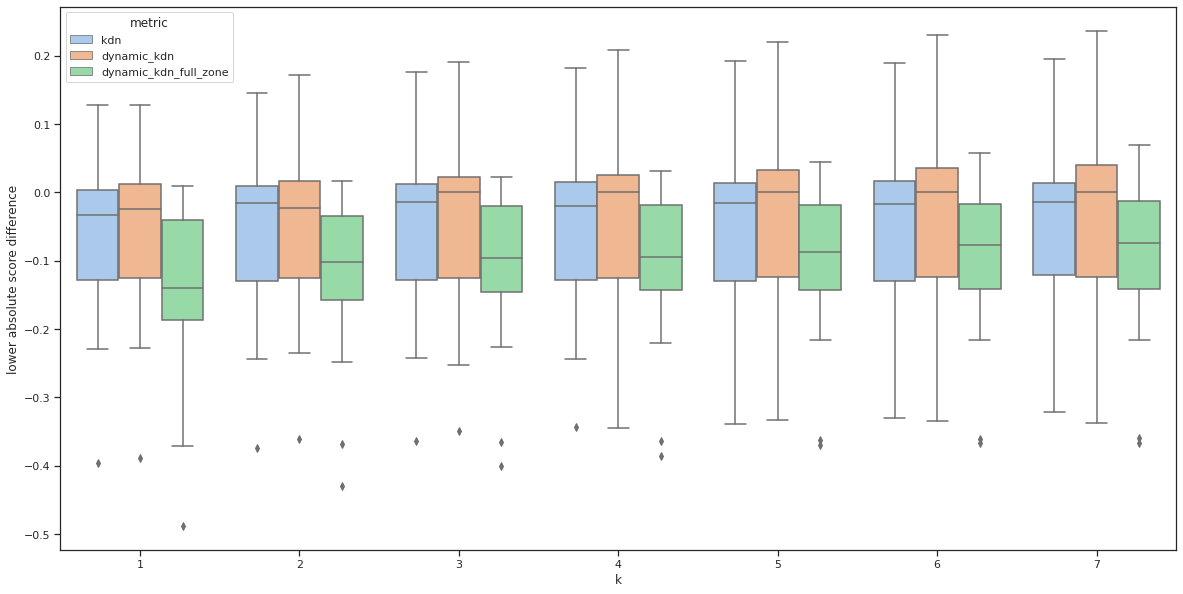

In [37]:
box_plot(df, "lower absolute score difference")

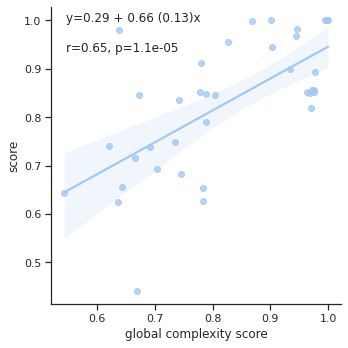

In [13]:
plot_reg(df, 5, 'kdn', 'global complexity score')

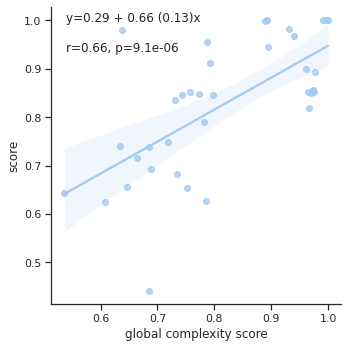

In [14]:
plot_reg(df, 3, 'dynamic_kdn', 'global complexity score')

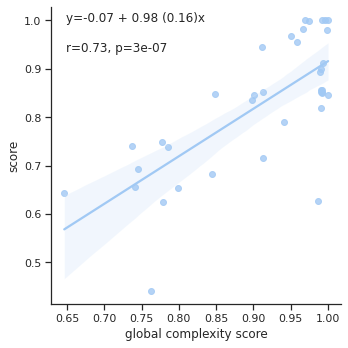

In [15]:
plot_reg(df, 3, 'dynamic_kdn_full_zone', 'global complexity score')

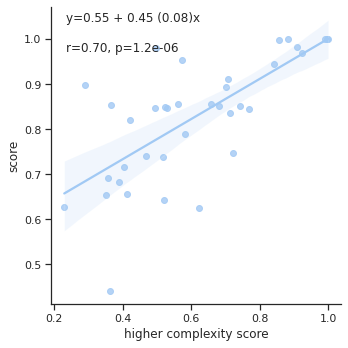

In [16]:
plot_reg(df, 5, 'kdn', 'higher complexity score')

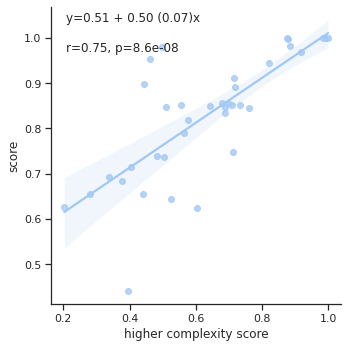

In [17]:
plot_reg(df, 3, 'dynamic_kdn', 'higher complexity score')

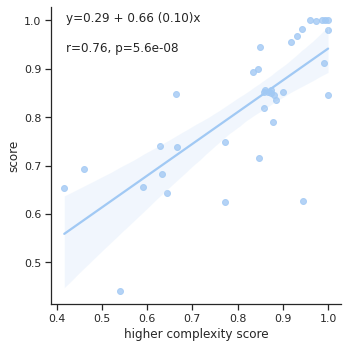

In [18]:
plot_reg(df, 3, 'dynamic_kdn_full_zone', 'higher complexity score')

In [138]:
def scorr(k, metric, class_complexity, score='score'):
    df_corr = df[(df['k'] == k) & (df['metric'] == metric)]
    return st.spearmanr(df_corr[score], df_corr[class_complexity])[0]

In [139]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'global complexity score'))

0.6932385122037518
0.6907841328635966
0.6949354798159019
0.6868700057371374
0.6776184325291427
0.6752462342706825
0.6647293515613076


In [140]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'global complexity score'))

0.7100831167097295
0.7085756198020476
0.6928005013832877
0.6642155123688428
0.6461868056045457
0.6459495857786997
0.6357491332673211


In [141]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'global complexity score'))

0.7008070258723
0.6720437666217614
0.6786859217454498
0.6669435403660721
0.6463054155174688
0.6428657280427014
0.635156083702706


In [142]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'higher complexity score'))

0.7813298070546632
0.7365675592518776
0.717751125320748
0.7092872792795858
0.6974262879872849
0.6696715683633012
0.6544894995091562


In [143]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'higher complexity score'))

0.7808553392805296
0.7791485179912372
0.7416677855075668
0.727434595956806
0.7300440140411121
0.7314673329961882
0.7378722682940306


In [144]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'higher complexity score'))

0.6204604794683123
0.7027637340688203
0.7251810076112688
0.7406002962912598
0.7490216001087933
0.7564940246229428
0.7614756409657091
